<a href="https://colab.research.google.com/github/xuxiufeng/Blockchain_Simulation_Multiple_Hackers_with_Resetting_Times/blob/main/Gamma_Weibull_Gamma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import weibull_min

In [31]:
np.random.seed(1)

In [32]:
k = 7

Generate $\eta_j$ and $\delta_j$, where $j=1,2,3,4$.

In [41]:
eta_list = np.random.uniform(1/6,1/3,k)
delta_list = np.random.uniform(1/7,1/3,k)
eta_list, delta_list

(array([0.31692439, 0.22665998, 0.23984366, 0.29469367, 0.25199636,
        0.30690478, 0.22352072]),
 array([0.2047781 , 0.17509415, 0.2722517 , 0.19205438, 0.19631845,
        0.2746425 , 0.33089488]))

For $X\sim Gamma(\eta_j, \delta_j)$, we have
\begin{eqnarray*}
f(x)=\frac{\delta_j^{\eta_j}}{\Gamma(\eta_j)}x^{\eta_j-1}e^{-\delta_j x}
\end{eqnarray*}

In [46]:
def ET_m(m, eta_list, delta_list, alpha, beta, theta, tau):
    def Generate_Z(m, eta_list, delta_list):
        sum_of_x_list = []
        for i in range(len(eta_list)):
            sum_of_x_list.append(np.sum(np.random.gamma(eta_list[i], 1/delta_list[i], m)))
        Z = min(sum_of_x_list)
        return Z
    def T_m(m, eta_list, delta_list, alpha, beta, theta, tau):
        sum_of_time = 0
        sum_of_w = 0
        y = weibull_min.rvs(c=beta, scale=alpha)
        w = np.random.gamma(theta, 1/tau)
        Z_m = Generate_Z(m, eta_list, delta_list)
        while Z_m > y:
            sum_of_time = sum_of_time + y + w
            sum_of_w += w
            Z_m = Generate_Z(m, eta_list, delta_list)
            y = weibull_min.rvs(c=beta, scale=alpha)
            w = np.random.gamma(theta, 1/tau)
        return sum_of_time + Z_m, sum_of_w

    ET = np.repeat(np.nan, m)
    sum_w = np.repeat(np.nan, m)
    for i in range(m):
        T_0 = 0
        W_0 = 0
        iter = 3000 # iter 30000
        for j in range(iter):
            T_0 += T_m(i+1, eta_list, delta_list, alpha, beta, theta, tau)[0]
            W_0 += T_m(i+1, eta_list, delta_list, alpha, beta, theta, tau)[1]
        ET[i] = T_0/iter
        sum_w[i] = W_0/iter
        print(ET[i])
    return ET, sum_w



0.7008235604723984
1.2779215394468086
1.7379458221936697
2.1465465489496114
2.8198966163016657
3.328517717457635
4.122430988028685
4.746120324559202
5.361474967812194
5.97886020761908
6.516514584696109
7.552687879498888
8.147418348929694
8.917579283359013
9.769404633683022
10.516914389209408
11.169245959514008
11.72951958761235
12.6921970051322
13.184546370332102
14.228617355237844
14.927421611137744
15.978742650835535
16.650610851154237
17.321737567651834
17.871300342754942
18.851598897086383
19.476779651538322
20.35367929173773
20.991063629211762
21.869730874327463
22.587235893450416
23.700699427143213
24.283005632621105
24.867066016518983
25.91510976797591
26.589134501728257
27.15313052357655
27.910084182194858
29.09750585196252


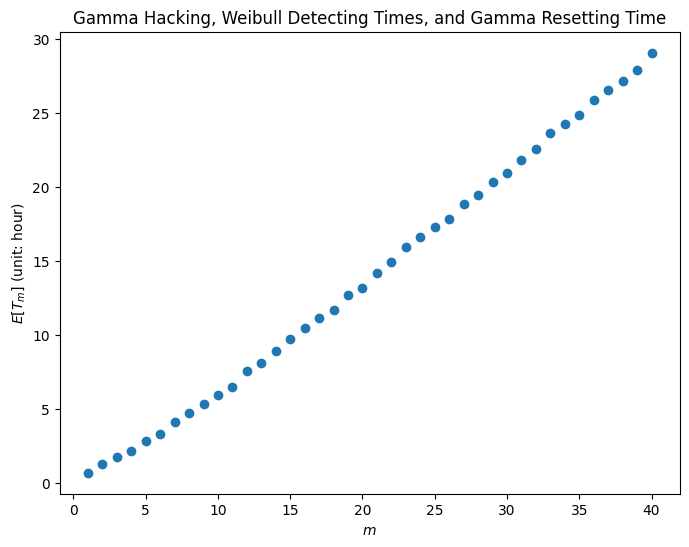

In [47]:
m = 40
alpha = 1/10
beta = 1/13
theta = 1/5
tau = 1/4
ET_m, sum_w = ET_m(m, eta_list, delta_list, alpha, beta, theta, tau)
fig = plt.figure(figsize=(8, 6))
plt.scatter(range(1, m+1), ET_m)
plt.xlabel(r'$m$')
plt.ylabel(r'$E[T_m]$ (unit: hour)')
plt.title('Gamma Hacking, Weibull Detecting Times, and Gamma Resetting Time')
plt.show()

In [96]:
R = [1.1*c**1.2 for c in range(1, m+1)]
C_2 = [.2*c**1.4 for c in range(1, m+1)]
C_1 = [2*c**1.3  for c in range(1, m+1)]
E_mNR = np.repeat(np.nan, len(ET_m))
for j in range(m):
  E_mNR[j] = ((ET_m[j]-sum_w[j])*(R[j] - C_2[j]) - C_1[j]*sum_w[j])/ET_m[j]
m_max = np.where(E_mNR == max(E_mNR))[0][0] + 1
print(m_max, max(E_mNR))
E_mNR

40 28.843266544825223


array([-1.82186853, -4.43758008, -6.76388915, -8.82046049, -7.86859755,
       -8.59328736, -7.93209742, -7.45129388, -6.78521539, -6.13279833,
       -6.1815622 , -4.32466505, -3.93990307, -2.66674589, -0.6436394 ,
       -0.70929138,  0.36171738,  1.20631803,  2.99453109,  2.02613487,
        4.64431809,  6.30409937,  8.03702162,  9.12849576,  9.56081459,
       11.26895446, 11.22550499, 13.12539003, 14.20460432, 13.70326653,
       16.23532632, 16.16336026, 17.80605804, 20.32957307, 20.21603434,
       22.63959528, 24.57630611, 24.60616261, 26.83157727, 28.84326654])

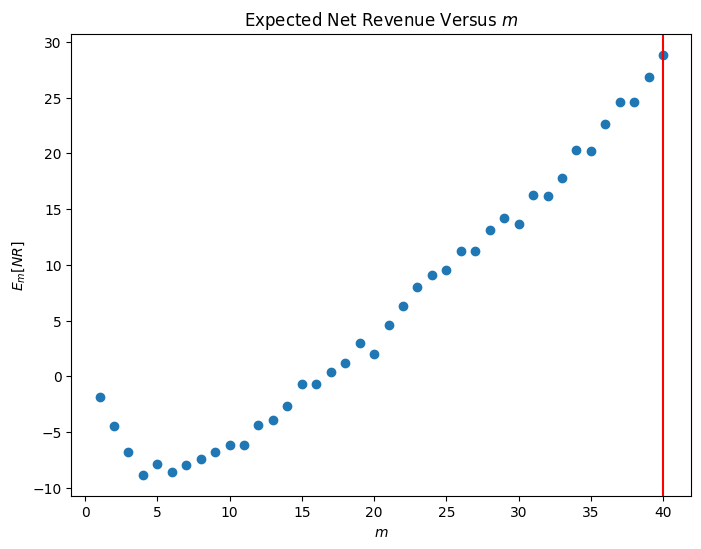

In [97]:
fig = plt.figure(figsize=(8, 6))
plt.scatter(range(1, m+1), E_mNR)
plt.axvline(x = m_max, c='red')
plt.xlabel(r'$m$')
plt.ylabel(r'$E_m[NR]$')
plt.title(r'Expected Net Revenue Versus $m$')
plt.show()